# Data Science From Scratch Notes

## Chapter 3: Visualizing Data

## matplotlib

The matplotlib library is good for simple charts and plots. More elaborate, interactive visualizations will need to be produced by a different library (e.g. seaborn, Altair, Bokeh).

We will use the `matplotlib.pyplot` module. `pyplot` maintains and internal state where we build up visualizations step-by-step. When we're done, we save the visualization with `savefig` or `show`:

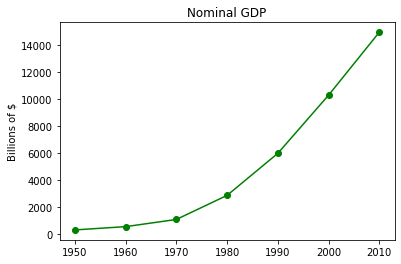

In [3]:
from matplotlib import pyplot as plt

years = [1950, 1960, 1970, 1980, 1990, 2000, 2010]
gdp = [300.2, 543.3, 1075.9, 2862.5, 5979.6, 10289.7, 14958.3]

# create a line chart, years on x-axis, gdp on y-axis
plt.plot(years, gdp, color='green', marker='o', linestyle='solid')

# add title
plt.title("Nominal GDP")

# add a label to the y-axis
plt.ylabel("Billions of $")
plt.show()

## Bar Charts

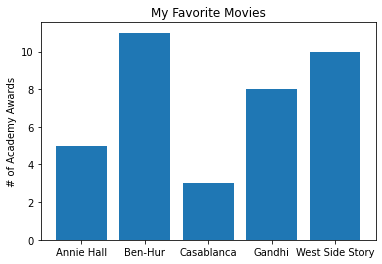

In [7]:
movies = ["Annie Hall", "Ben-Hur", "Casablanca", "Gandhi", "West Side Story"]
num_oscars = [5, 11, 3, 8, 10]

# plot bars with left x-coordinates [0, 1, 2, 3, 4], heights [num_oscars]
plt.bar(range(len(movies)), num_oscars)

plt.title("My Favorite Movies") # add title
plt.ylabel("# of Academy Awards") # label the y-axis

# label x-axis with movie names at bar centers
plt.xticks(range(len(movies)), movies)

plt.show()

### Histogram

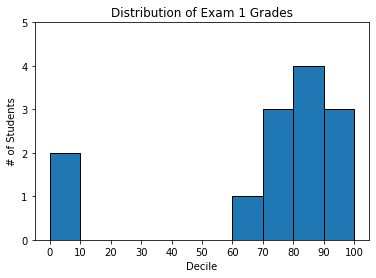

In [9]:
from collections import Counter
grades = [83, 95, 91, 87, 70, 0, 85, 82, 100, 67, 73, 77, 0]

# Bucket grades by decile, but put 100 in with the 90s
## // indicates that we want integer (floor) division
histogram = Counter(min(grade // 10 * 10, 90) for grade in grades)

plt.bar([x + 5 for x in histogram.keys()], # Shift bars right by 5
       histogram.values(), # Give each bar its correct height
       10, # Give each bar a width 10
       edgecolor=(0, 0, 0)) # Black edges for each bar

plt.axis([-5, 105, 0, 5]) # x-axis from -5 to 105, y-axis from 0 to 5

plt.xticks([10 * i for i in range(11)]) # x-axis labels at 0, 10, ..., 100
plt.xlabel("Decile")
plt.ylabel("# of Students")
plt.title("Distribution of Exam 1 Grades")
plt.show()

We need to make sure that the y-axis starts at 0. Otherwise, it might mislead people:

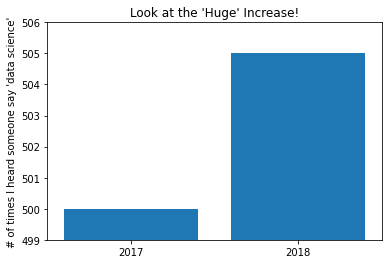

In [14]:
mentions = [500, 505]
years = [2017, 2018]

plt.bar(years, mentions, 0.8)
plt.xticks(years)
plt.ylabel("# of times I heard someone say 'data science'")

# if you don't do this, matplotlib will label the x-axis 0, 1
# and then add a +2.013e3 off in the corner(bad matplotlib!)
plt.ticklabel_format(useOffset=False)

# misleading y-axis only shows the part above 500
plt.axis([2016.5, 2018.5, 499, 506])
plt.title("Look at the 'Huge' Increase!")
plt.show()

Here we use more sensible axes, and it looks far less impressive:

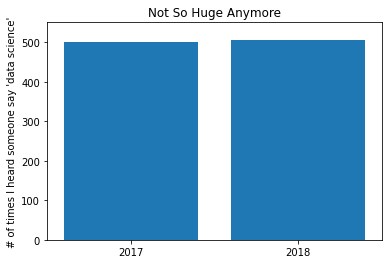

In [16]:
plt.bar(years, mentions, 0.8)
plt.xticks(years)
plt.ylabel("# of times I heard someone say 'data science'")
plt.axis([2016.5, 2018.5, 0, 550])
plt.title("Not So Huge Anymore")
plt.show()

## Line Charts

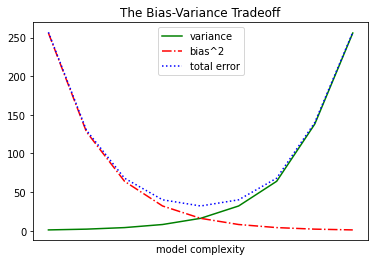

In [19]:
variance = [1, 2, 4, 8, 16, 32, 64, 138, 256]
bias_squared = [256, 128, 64, 32, 16, 8, 4, 2, 1]
total_error = [x + y for x, y in zip(variance, bias_squared)]
xs = [i for i, _ in enumerate(variance)]

# We can make multiple calls to plt.plot
# to show multiple series on the same chart
plt.plot(xs, variance, 'g-', label='variance') # green solid line
plt.plot(xs, bias_squared, 'r-.', label='bias^2') # red dot-dashed line
plt.plot(xs, total_error, 'b:', label='total error') # blue dotted line

# Because we've assigned labels to each series,
# we can get a legend for free (loc=9 means "top center")
plt.legend(loc=9)
plt.xlabel("model complexity")
plt.xticks([])
plt.title("The Bias-Variance Tradeoff")
plt.show()

## Scatterplots

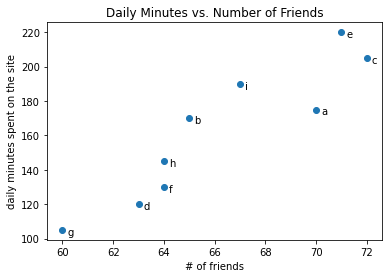

In [21]:
friends = [70, 65, 72, 63, 71, 64, 60, 64, 67]
minutes = [175, 170, 205, 120, 220, 130, 105, 145, 190]
labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i']

plt.scatter(friends, minutes)

# label each point
for label, friend_count, minute_count in zip(labels, friends, minutes):
    plt.annotate(label,
                xy=(friend_count, minute_count), # Put the label with its point
                xytext=(5, -5), # but slightly offset
                textcoords='offset points')
    
plt.title("Daily Minutes vs. Number of Friends")
plt.xlabel("# of friends")
plt.ylabel("daily minutes spent on the site")
plt.show()

If we're scattering comparable variables, we might get a misleading picture if we let matpltolib choose the scale:

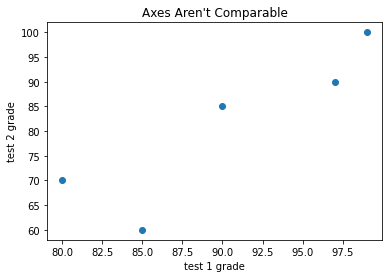

In [22]:
test_1_grades = [99, 90, 85, 97, 80]
test_2_grades = [100, 85, 60, 90, 70]

plt.scatter(test_1_grades, test_2_grades)
plt.title("Axes Aren't Comparable")
plt.xlabel("test 1 grade")
plt.ylabel("test 2 grade")
plt.show()

If we include a call to `plt.axis("equal")`, the plot more accurately shows that most of the variation occurs on test 2:

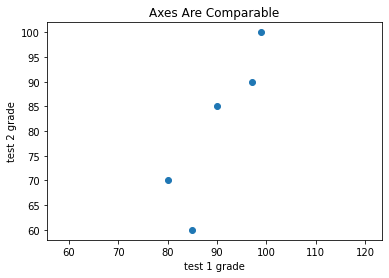

In [24]:
plt.scatter(test_1_grades, test_2_grades)
plt.axis("equal") # makes the scale of both axes equal
plt.title("Axes Are Comparable")
plt.xlabel("test 1 grade")
plt.ylabel("test 2 grade")
plt.show()